## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Import liabraries and load datasets</p>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [30]:
# load data
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\Heart-failure-prediction\\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Data Dictionary</p>
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or - ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]     
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Exploratory Data Analysis</p>

In [31]:
# data shape
df.shape

(918, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
# show unique values
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [34]:
# data basic statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [35]:
# missing values in decerding order
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [36]:
# duplicated values
df.duplicated().sum()

0

In [37]:
# numerical and categorical features 
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])
print('Categorical features:\n', Categorical)
print('Numerical features:\n', Numerical)

Categorical features:
     Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
Numerical features:
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130       

In [38]:
# count target variable
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Visualization</p>

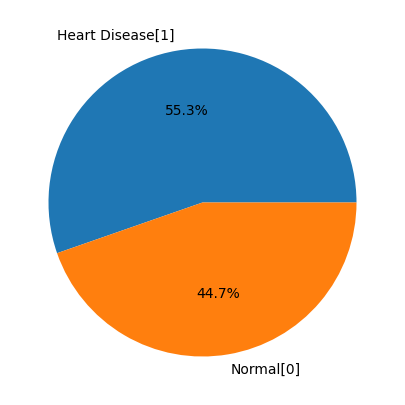

In [39]:
# Normal and Heart Disease with target column
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

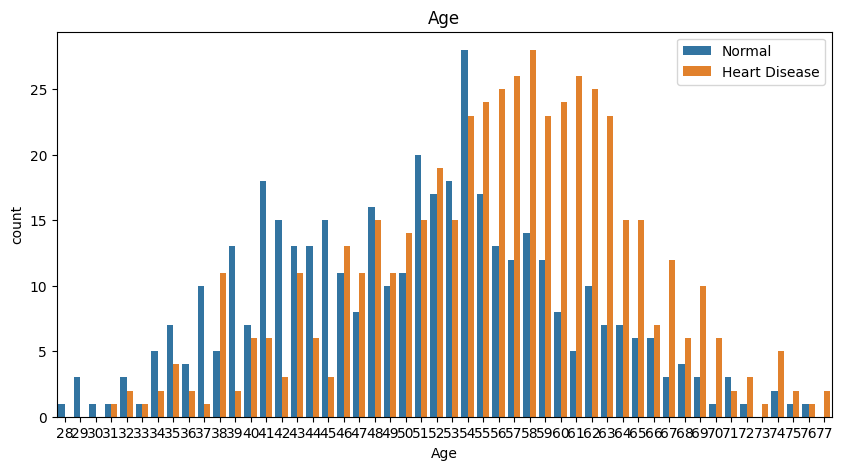

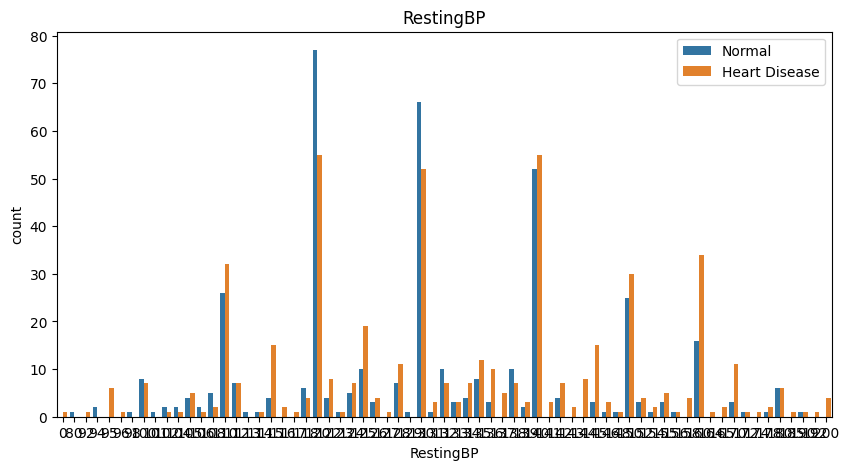

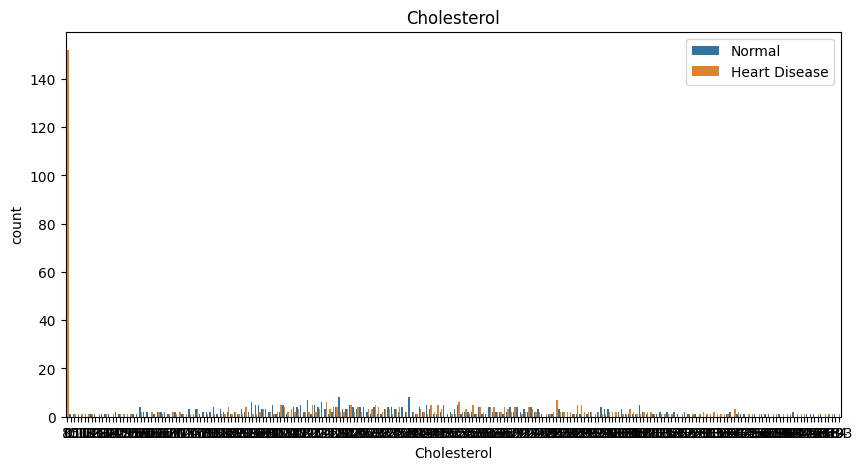

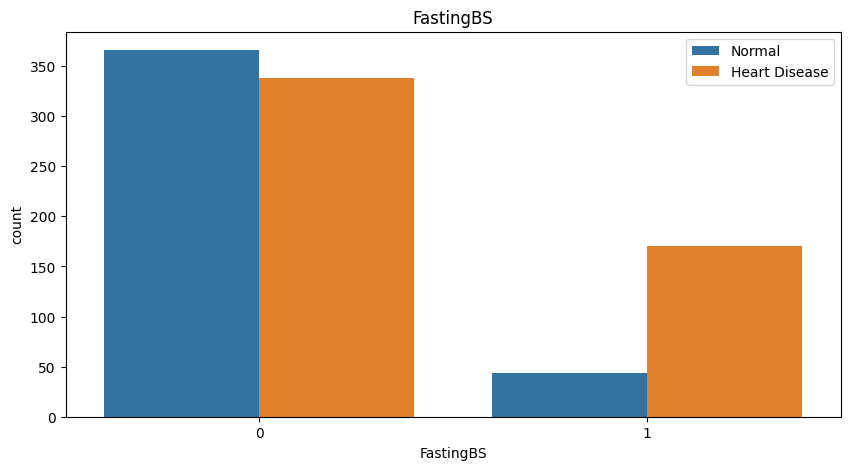

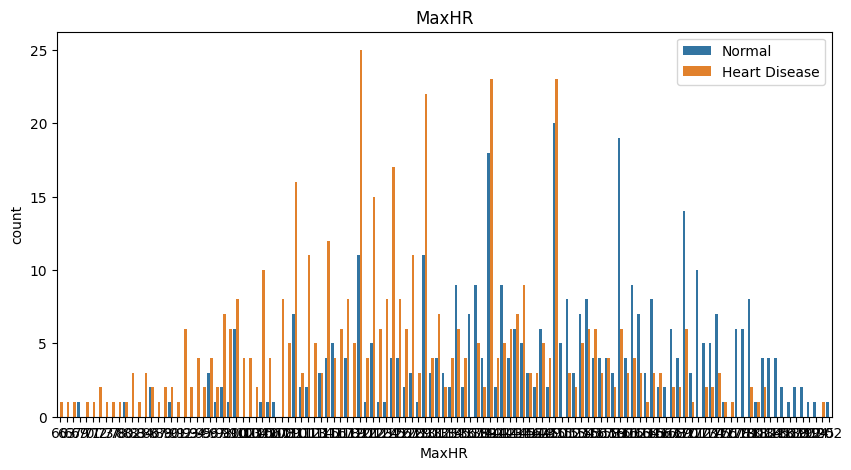

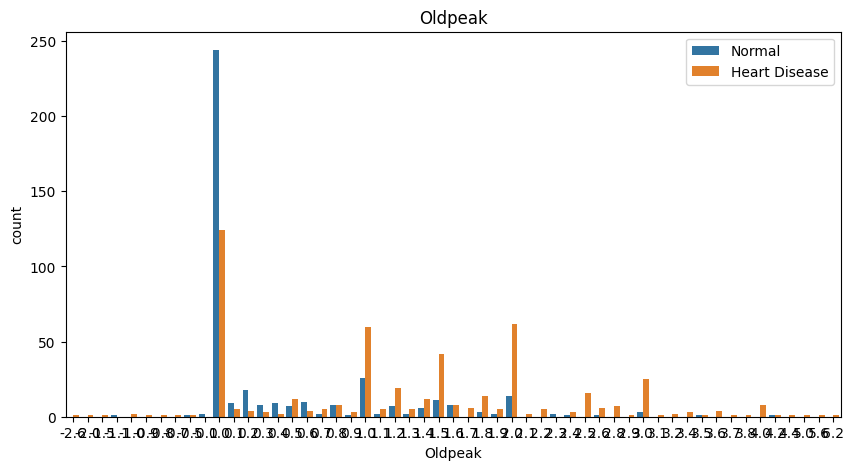

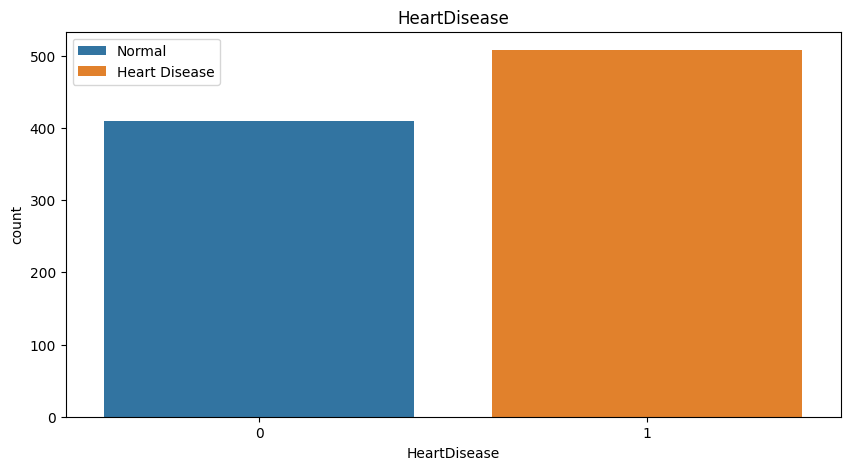

In [40]:
# ploting numerical features with target
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

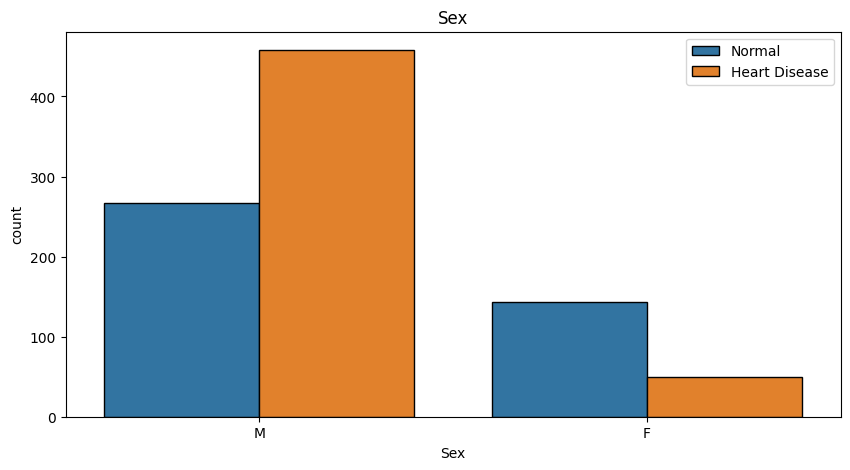

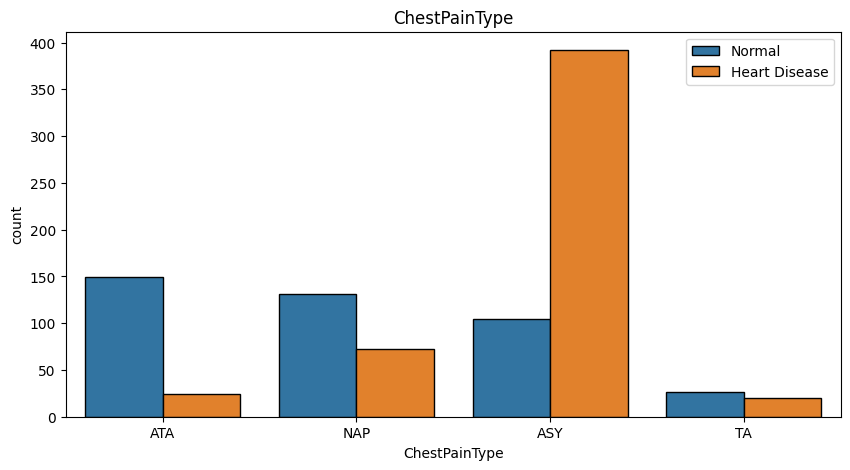

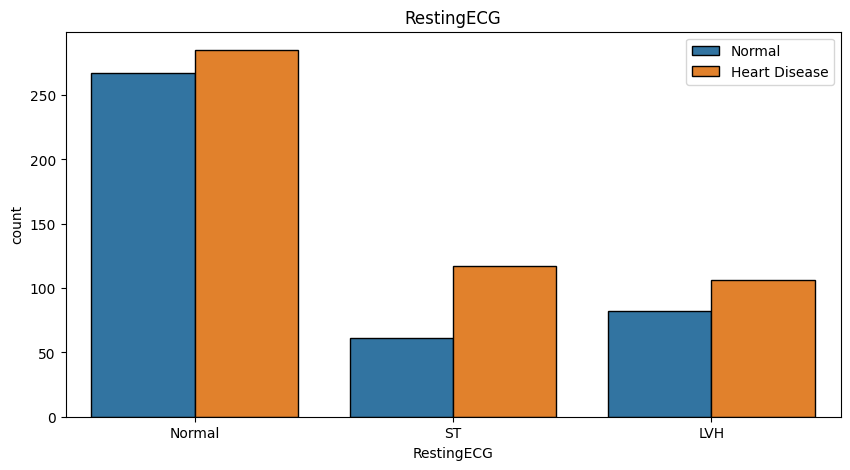

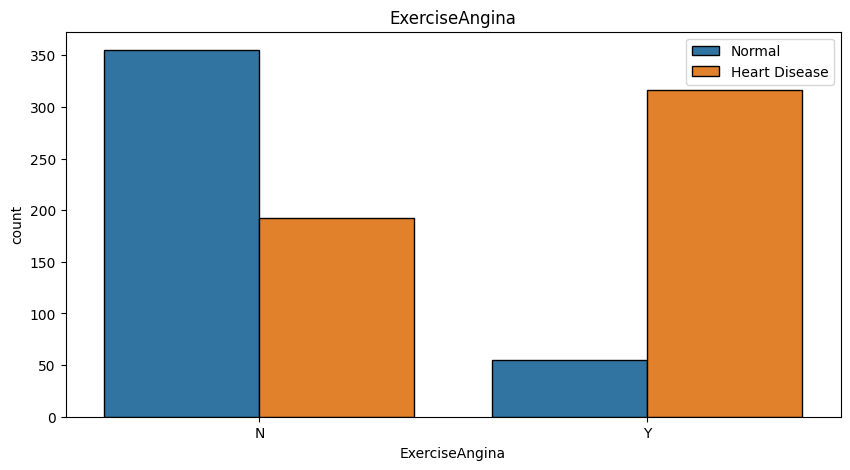

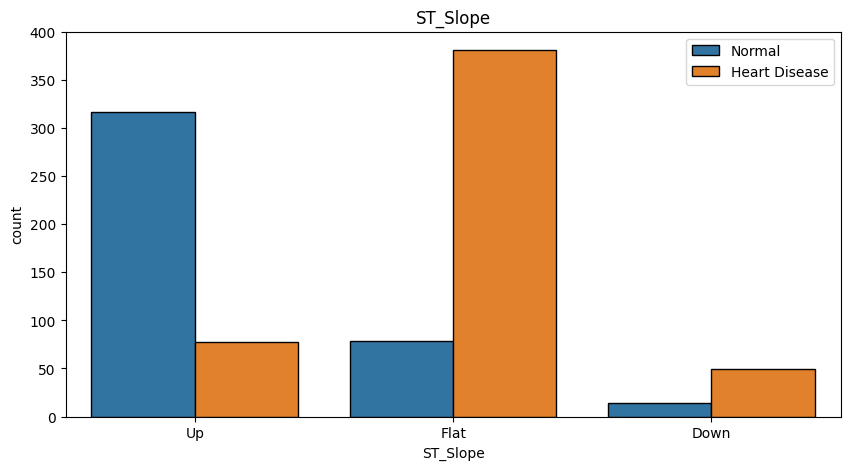

In [41]:
#ploting categorical features with target
for i in Categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

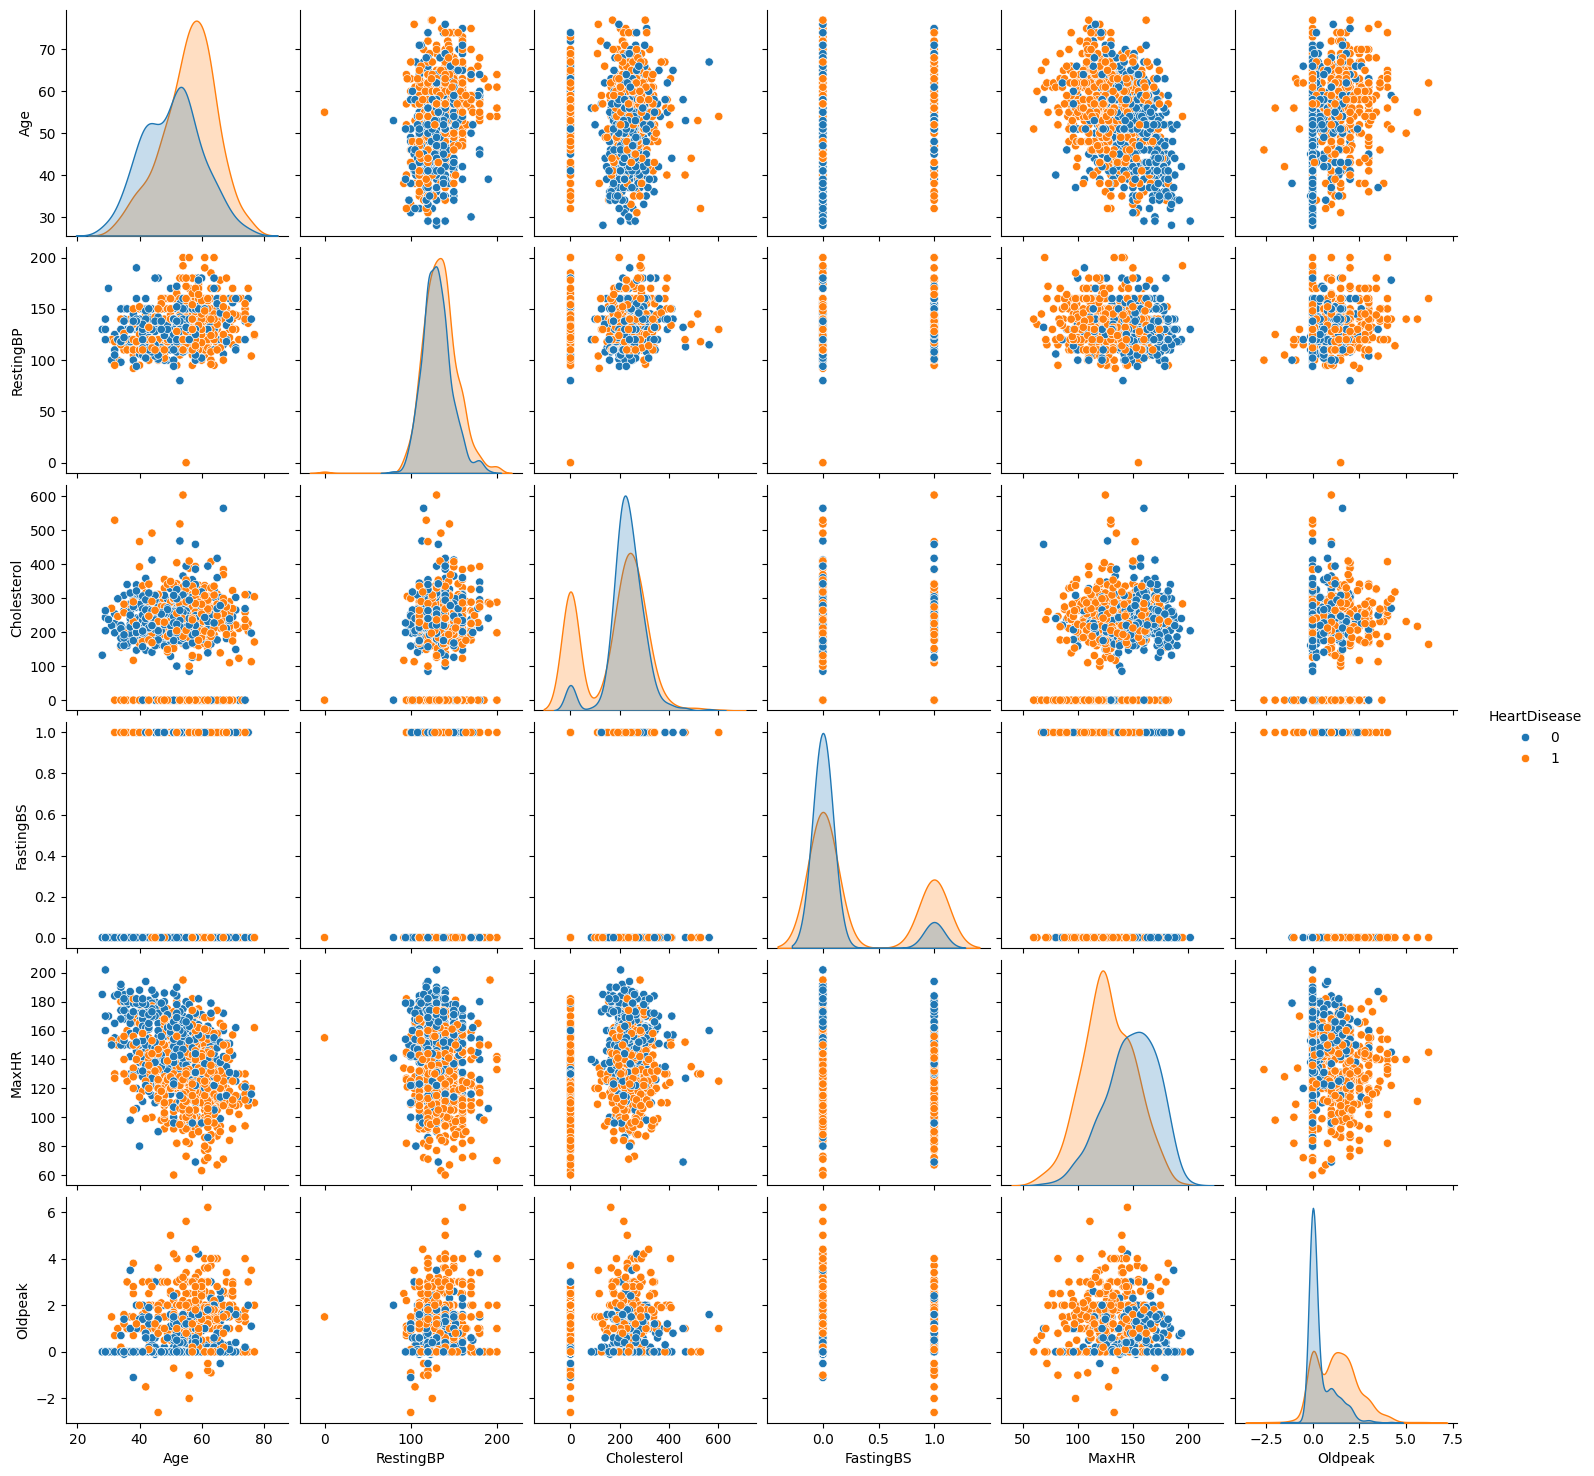

In [42]:
#pairplot using target HeartDisease Column
sns.pairplot(df, hue='HeartDisease')
plt.show()

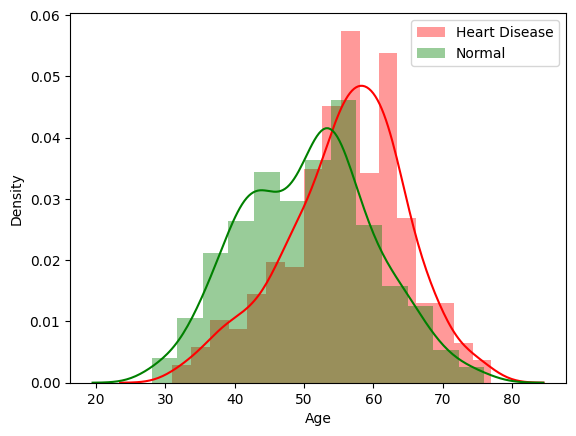

In [43]:
# distribution plot of Age for HeartDisease
sns.distplot(df['Age'][df['HeartDisease'] == 1], kde=True, color='red', label='Heart Disease')
sns.distplot(df['Age'][df['HeartDisease'] == 0], kde=True, color='green', label='Normal')
plt.legend()

## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Data Preprocessing</p>

In [44]:
# select numerical features and encoding it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# apply label encoding
numerical_features = numerical_features.apply(LabelEncoder().fit_transform)
numerical_features.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,12,41,147,0,98,10,0
1,21,55,40,0,82,20,1
2,9,31,141,0,25,10,0
3,20,39,72,0,34,25,1
4,26,49,53,0,48,10,0


In [45]:
# One-Hot encoding the categorical features using get_dummies()
# select categorical features
categorical_features = df.select_dtypes(include=['object'])
# apply get_dummies encoding
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [46]:
# combine numerical and categorical features
combined = pd.concat([numerical_features, categorical_features], axis=1)
combined.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,12,41,147,0,98,10,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,21,55,40,0,82,20,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,9,31,141,0,25,10,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,20,39,72,0,34,25,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,26,49,53,0,48,10,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [47]:
# separet features and target
X = combined.drop(['HeartDisease'], axis=1)
y = combined['HeartDisease']

In [48]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,12,41,147,0,98,10,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,21,55,40,0,82,20,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,9,31,141,0,25,10,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,20,39,72,0,34,25,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,26,49,53,0,48,10,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [49]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [50]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Model 1: XGboost</p>

In [51]:
pip install xgboost

In [52]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=590)
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8586956521739131


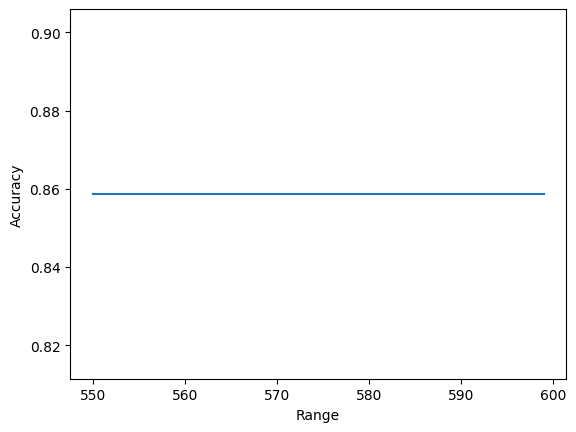

In [53]:
# Finding the best parameters using loop
accuracy = []
for i in range(550, 600):
    model = XGBClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
# ploting accuracy graph
plt.plot(range(550, 600), accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Range')
plt.show()

In [54]:
# print precetion, recall, f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



<Axes: >

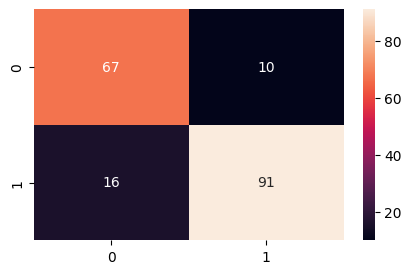

In [55]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)

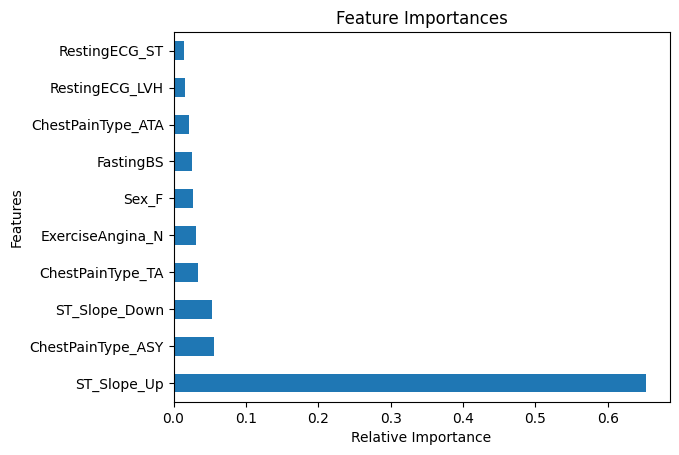

In [56]:
# Feature importance for xgboost
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Model 2: Catboost</p>

In [58]:
pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/101.7 MB 5.6 MB/s eta 0:00:19
    --------------------------------------- 2.1/101.7 MB 6.2 MB/s eta 0:00:17
   - -------------------------------------- 3.7/101.7 MB 8.7 MB/s eta 0:00:12
   -- ------------------------------------- 7.1/101.7 MB 9.7 MB/s eta 0:00:10
   --- ------------------------------------ 9.4/101.7 MB 10.0 MB/s eta 0:00:10
   ---- ----------------------------------- 11.8/101.7 MB 10.1 MB/s eta 0:00:09
   ----- ---------------------------------- 14.2/101.7 MB 10.2 MB/s eta 0:00:09
   ------ --------------------------------- 16.5/101.7 MB 10.3 MB/s eta 0:00:09
   ------- -------------------------------- 18.6/101.7 MB 10.3 MB/s eta 0:00:09
   -------- ------------------------------- 21.0/101.7 MB 10.4 MB/s eta 0:00:08
   --------- ------------------------------ 23.3/101.7 MB 10.5 MB/s eta 0:00:08
   --------- ------------------------------ 25.4/101.7 MB

In [59]:
# model building catboost
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=107)
model2.fit(X_train, y_train)
# predict
y_pred = model2.predict(X_test)
# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))
# print classification report
from sklearn.metrics import classification_report
print('Classification report\n',classification_report(y_test, y_pred))

Learning rate set to 0.070088
0:	learn: 0.6331763	total: 164ms	remaining: 17.4s
1:	learn: 0.5995431	total: 172ms	remaining: 9s
2:	learn: 0.5514355	total: 178ms	remaining: 6.16s
3:	learn: 0.5155648	total: 183ms	remaining: 4.72s
4:	learn: 0.4791158	total: 189ms	remaining: 3.85s
5:	learn: 0.4544186	total: 199ms	remaining: 3.34s
6:	learn: 0.4304883	total: 204ms	remaining: 2.91s
7:	learn: 0.4094613	total: 207ms	remaining: 2.56s
8:	learn: 0.3956577	total: 210ms	remaining: 2.29s
9:	learn: 0.3754515	total: 216ms	remaining: 2.09s
10:	learn: 0.3628197	total: 220ms	remaining: 1.92s
11:	learn: 0.3521139	total: 233ms	remaining: 1.84s
12:	learn: 0.3404626	total: 239ms	remaining: 1.73s
13:	learn: 0.3329384	total: 246ms	remaining: 1.64s
14:	learn: 0.3258527	total: 251ms	remaining: 1.54s
15:	learn: 0.3172249	total: 259ms	remaining: 1.47s
16:	learn: 0.3133727	total: 264ms	remaining: 1.4s
17:	learn: 0.3090709	total: 275ms	remaining: 1.36s
18:	learn: 0.3049903	total: 279ms	remaining: 1.29s
19:	learn: 0.29

Learning rate set to 0.074574
0:	learn: 0.6296151	total: 3.5ms	remaining: 346ms
1:	learn: 0.5944451	total: 7.18ms	remaining: 352ms
2:	learn: 0.5444231	total: 10.1ms	remaining: 326ms
3:	learn: 0.5075946	total: 13.6ms	remaining: 328ms
4:	learn: 0.4726533	total: 16.7ms	remaining: 318ms
5:	learn: 0.4475321	total: 20ms	remaining: 313ms
6:	learn: 0.4233308	total: 23.3ms	remaining: 309ms
7:	learn: 0.4022525	total: 26.3ms	remaining: 303ms
8:	learn: 0.3885637	total: 30.2ms	remaining: 306ms
9:	learn: 0.3727882	total: 34.1ms	remaining: 307ms
10:	learn: 0.3619667	total: 37.4ms	remaining: 302ms
11:	learn: 0.3498995	total: 41ms	remaining: 300ms
12:	learn: 0.3339893	total: 45.8ms	remaining: 306ms
13:	learn: 0.3284279	total: 51.4ms	remaining: 316ms
14:	learn: 0.3172913	total: 57.5ms	remaining: 326ms
15:	learn: 0.3089918	total: 70.2ms	remaining: 368ms
16:	learn: 0.2984843	total: 75ms	remaining: 366ms
17:	learn: 0.2934859	total: 78.9ms	remaining: 359ms
18:	learn: 0.2881667	total: 81.9ms	remaining: 349ms

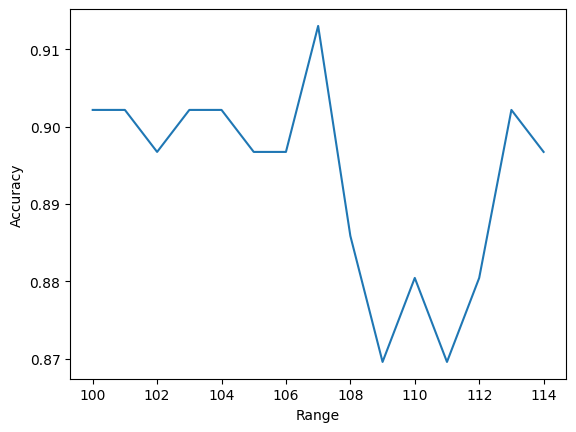

In [60]:
accuracy = []
for i in range(100, 115):
    model2 = CatBoostClassifier(iterations=i)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(range(100, 115), accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Range')
plt.show()

<Axes: >

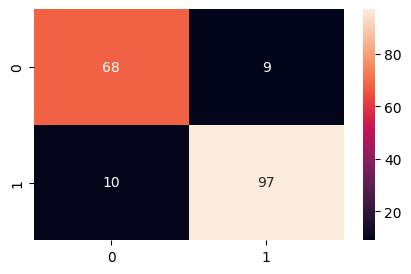

In [61]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)

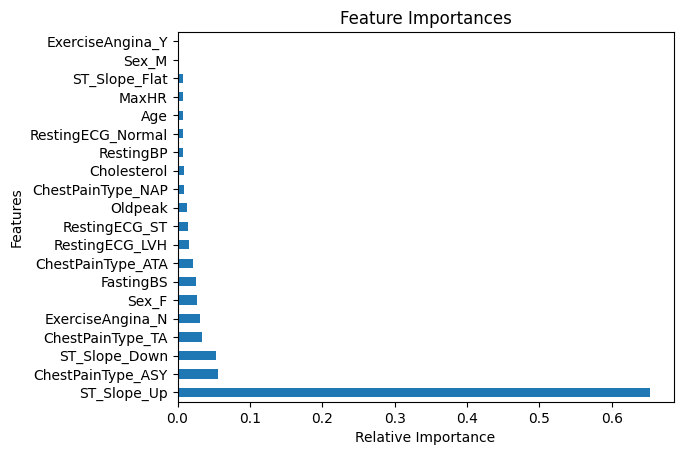

In [62]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show() 

## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Model 3: Random Forest</p>

In [64]:
model_RF = model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_predict_test = model_RF.predict(X_test)

In [66]:
y_test.values[:20]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [67]:
y_predict_test[:20]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



Accuracy of testing is: 0.875
[[67 10]
 [13 94]]


Text(20.72222222222222, 0.5, 'Actual')

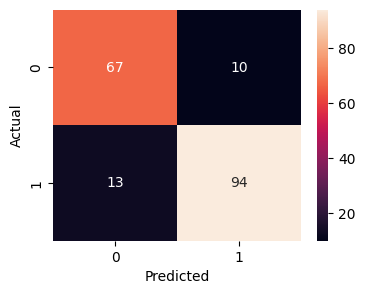

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_predict_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 5px;">Model 4: Logistic Regression</p>

In [70]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_predict_test = model_LR.predict(X_test)
y_test.values[:20]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [73]:
y_predict_test[:20]

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Accuracy of testing is: 0.8478260869565217
[[67 10]
 [18 89]]


Text(20.72222222222222, 0.5, 'Actual')

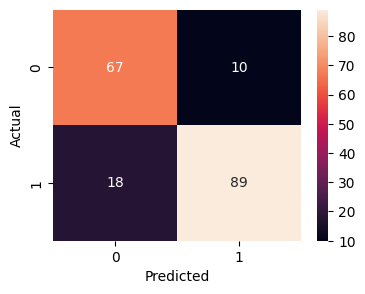

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_predict_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_predict_test)
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")